In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
data = pd.read_csv(
    'beer.txt', sep="\t",header=None)

In [3]:
X_data = data[[0,1,2,4,5,6,7,9]]
y_data = data[[3]]


In [4]:
X1_df = pd.DataFrame(X_data) #converting the input data into dataframe

In [5]:
# ale = 0, lager = 1, stout = 2
y2_test = pd.get_dummies(y_data)
y2_test.columns = [0,1,2]
#y2_test

In [6]:
#StandardScaler function performs normalization on values in X and return new X dataframe 
def StandardScaler(X):
    X_std = pd.DataFrame(X)
    n = X.shape[0]
    for col in range(X.shape[1]):
        col_sum = X.iloc[:,col].sum()
        col_mean = X.iloc[:,col].mean()
        sd = X.iloc[:,col].std()
        for row in range(X.shape[0]):
            x =  X.iloc[row,col]
            y = (x - col_mean)/sd
            X_std.iloc[row,col] = y
    
    return X_std 

In [7]:
X2_std = StandardScaler(X1_df)

In [8]:
theta = np.ones(X2_std.shape[1]) # initialise theta

In [9]:
def sigmoid(theta, X):
    z = np.dot(theta,X.T)    #Transpose of X is taken before doing a dot product of X and theta
    h = 1 / (1 + np.exp(-z))
    return h 

In [10]:
def gradient_descent_new(X, y, theta, alpha, epochs):
    m = len(X1_df)
    for _ in range(epochs):
        for style in range(y.shape[1]):  #this loop runs for each class in y
            theta = pd.DataFrame(theta)
            h = sigmoid(theta.iloc[:,style], X)  #calls to hypothesis function 
            for feature in range(0, theta.shape[0]):
                theta.iloc[feature, style] -= (alpha/m) * np.sum((h-y.iloc[:, style])*X.iloc[:, feature])
            theta = pd.DataFrame(theta)
          
    return theta         

In [11]:
def fit(X,y):
    no_of_iterations = 2000
    learning_rate = 0.01
    theta = np.zeros([X.shape[1], y.shape[1]])
    theta_new = gradient_descent_new(X, y, theta, learning_rate, no_of_iterations) 
    return theta_new


In [12]:
def predict(X,theta_new):
    temp_pred = []
    y_temp = []
    
    for col in range(0,theta_new.shape[1]):
        h_pred = sigmoid(theta_new.iloc[:,col],X)
        temp_pred.append(h_pred)
    temp_pred = pd.DataFrame(temp_pred)

    
    for col in range(0, temp_pred.shape[1]):     # find max value of each column in temp_pred
        temp1 = temp_pred.iloc[:,col]
        m1 = max(temp1)
        i = list(temp1).index(m1)
        y_temp.append(i)
    
    y_pred = pd.DataFrame(y_temp)
    return y_pred

In [13]:
def accurracy(y_pred,y_test):
    y2_t = []
    correct = 0
    
    #convert one hot encoded t_test matrix to a dataframe with single column with 0,1,2 as values for each class of y
    for row in range(y_test.shape[0]):
        for col in range(y_test.shape[1]):
            if(y_test.iloc[row,col]==1):
                y2_t.append(col)
    y2 = pd.DataFrame(y2_t)
    
    correct = 0
    for row in range(y_test.shape[0]):                       #check if value in y_pred is same as value in y_test
         if (y_pred.iloc[row,0]==y2.iloc[row,0]):
                 correct += 1
    accuracy_value = (correct / y_test.shape[0])*100
    return accuracy_value
    

In [14]:
# This function converts the y_test and y_pred dataframe with numeric values to one output dataframe "final" which has string data "ale","lager" and "stout"
def write_output(y_pred,y_test):
    
    y_test1 = y_test.idxmax(axis=1)
    final = pd.DataFrame(columns = ['Predicted values', 'Actual values'])
    o2 = pd.DataFrame(y_test1)
    o2 = o2.reset_index(drop=True)
    final['Predicted values'] = y_pred.iloc[:,0]
    final['Actual values'] = o2.iloc[:,0]
    final2 = pd.DataFrame(final)
    for col in final2.columns:
        final2 = pd.DataFrame(final2)
        for i in range(0,3): 
            temp = pd.DataFrame(final[col])
            if i == 0:
                final2.loc[(final2[col] == i, col)] = 'ale' 
            elif i == 1:
                 final2.loc[(final2[col] == i, col)] = 'lager'
            elif i == 2:
                 final2.loc[(final2[col] == i, col)] = 'stout'
        
    final2.to_csv("AlgorithmTestResults.csv",mode='a')
    return final2
  

In [15]:
## Calling Fit and predict function
print("----Custom Logistic Regression Implementation----")
for _ in range (0,10):
    print("Running model for iteration ",_+1)
    X_train,X_test,y_train,y_test = train_test_split(X2_std,y2_test,test_size = 0.33)
    theta_learn = fit(X_train,y_train)
    y_pred = predict(X_test,theta_learn)
    output = write_output(y_pred,y_test)
    acc = accurracy(y_pred,y_test)
    print("Accuracy = ",acc)



----Custom Logistic Regression Implementation----
Running model for iteration  1
Accuracy =  92.15686274509804
Running model for iteration  2
Accuracy =  94.11764705882352
Running model for iteration  3
Accuracy =  94.11764705882352
Running model for iteration  4
Accuracy =  94.11764705882352
Running model for iteration  5
Accuracy =  100.0
Running model for iteration  6
Accuracy =  94.11764705882352
Running model for iteration  7
Accuracy =  96.07843137254902
Running model for iteration  8
Accuracy =  94.11764705882352
Running model for iteration  9
Accuracy =  96.07843137254902
Running model for iteration  10
Accuracy =  90.19607843137256


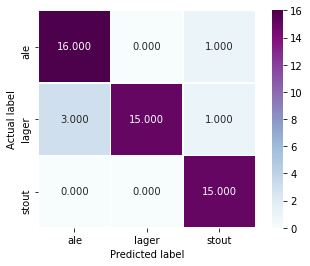

In [16]:
#Prints confusion matrix of the last iteration of our custom implementation
pred = output[['Predicted values']]
test = output[['Actual values']]
cfm = confusion_matrix(test, pred)
sns.heatmap(pd.DataFrame(cfm, index=np.unique(test), columns=np.unique(pred)),annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuPu',);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


----Logistic Regression Implementation from sk learn----
Running model for iteration  1
Accuracy =  96.07843137254902
Running model for iteration  2
Accuracy =  100.0
Running model for iteration  3
Accuracy =  96.07843137254902
Running model for iteration  4
Accuracy =  94.11764705882352
Running model for iteration  5
Accuracy =  92.15686274509804
Running model for iteration  6
Accuracy =  96.07843137254902
Running model for iteration  7
Accuracy =  94.11764705882352
Running model for iteration  8
Accuracy =  96.07843137254902
Running model for iteration  9
Accuracy =  92.15686274509804
Running model for iteration  10
Accuracy =  90.19607843137256


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

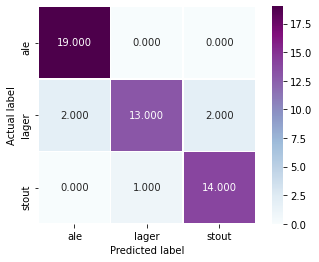

In [21]:
#Checking implementation using sk learn
output = pd.DataFrame(columns = ['Predicted values', 'Actual values'])
print("----Logistic Regression Implementation from sk learn----")
for _ in range (10):
    print("Running model for iteration ",_+1)
    X_train,X_test,y_train,y_test = train_test_split(X2_std,y_data,test_size = 0.33)
    Logistic_model = linear_model.LogisticRegression(multi_class='multinomial',solver ='newton-cg')
    train_model = Logistic_model.fit(X_train,y_train)
    y_pred = Logistic_model.predict(X_test)

    output['Predicted values'] = y_pred
    output['Actual values'] = y_test
    output.to_csv("SkLearnTestResults.csv",mode='a')
    accr = metrics.accuracy_score(y_test, y_pred)*100
    print("Accuracy = ",accr)

#Prints confusion matrix of the last iteration of our sk learn algo implementation    
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cfm, index=np.unique(test), columns=np.unique(pred)),annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuPu',);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [23]:
y_test

,3
98,lager
107,stout
16,ale
49,ale
9,ale
13,ale
143,stout
24,ale
18,ale
33,ale
